In [3]:
# k-means clustering

# Simple unsupervised learning algorithm that is used for quickly predicting groupings from within an unlabeled dataset

# Predictions are based on: 1) number of cluster centers present (k) 2) Nearest mean values measured in Euclidian distance
# between observations

# Use-cases:
# 1) Market price and cost modelling
# 2) Customer segmentation
# 3) Insurance claim fraud detection
# 4) Hedge fund classification

# When using k-means:
# 1) Scale your variables before clustering your data
# 2)You need to look at a scatter plot or a data table to estimate the number of cluster centers to set for the k parameter in
# the model.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm

from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
%matplotlib inline
plt.figure(figsize=(7,4))

In [9]:
# Load dataset

iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)

vrble_names = iris.feature_names
X[:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [10]:
# Building and running the model

clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [11]:
# Plotting model outputs

iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

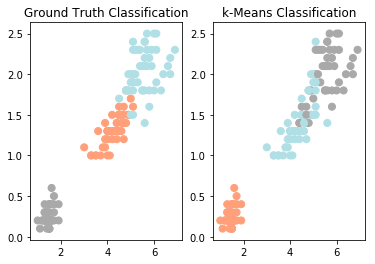

In [13]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('k-Means Classification')

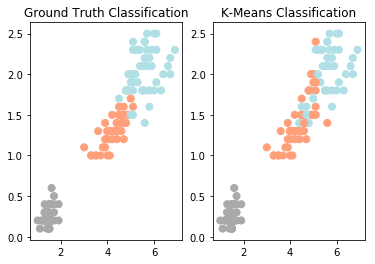

In [14]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

In [15]:
# Evaluate your clustering results

# Precision: A measure of the model's relevancy
# Recall: A measure of the model's completeness

# In ML, we want High Precision + High recall = Highly accurate model results.

print(classification_report(y,relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

